In [1]:
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pandas.tools.plotting import scatter_matrix

In [3]:
import statsmodels.formula.api as smf

In [4]:
path = 'https://raw.githubusercontent.com/ssb10/PUI2017_ssb602/master/HW6_ssb602/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv'
energy_df = pd.read_csv(path)

In [5]:
energy_df.head(2)

,Record Number,BBL,Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Postcode,DOF Benchmarking Submission Status,...,DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,NTA
0,12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,...,NaN,Office,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14354,4.021460e+09,NaN,NaN,NaN,63-10,108 STREET,Queens,11375.0,No Submission Matched to BBL,...,82730.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
manhattan = pd.read_csv("https://raw.githubusercontent.com/clapham13/PUI2017_acs882/master/HW6_acs882/MN.csv")

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (19,22,23,25,63,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
energy_df.columns

Index(['Record Number', 'BBL', 'Co-reported BBL Status', 'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)', 'Street Number',
       'Street Name', 'Borough', 'Postcode',
       'DOF Benchmarking Submission Status', 'Site EUI(kBtu/ft2)',
       'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'Reported Property Floor Area (Building(s)) (ft²)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'DOF Number of Buildings',
       'Latitude', 'Longitude', 'Community Board', 'Council District',
       'Census Tract', 'BIN', 'NTA'],
      dtype='object')

In [11]:
##dropping unwanted columns
energy_df.drop(['Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
                'Automatic Water Benchmarking Eligible','Reported Water Method',
               'Total GHG Emissions(MtCO2e)','Direct GHG Emissions(MtCO2e)',
               'Indirect GHG Emissions(MtCO2e)','Primary Property Type - Self Selected',
               'Latitude','Longitude','Community Board','Council District','Census Tract', 'BIN', 'NTA'],
              axis=1, inplace=True)

In [12]:
energy_df.drop(['Street Number','Street Name'], axis=1, inplace=True)

In [13]:
energy_df_new = energy_df[['BBL','ENERGY STAR Score','DOF Property Floor Area (Buildngs and Parking)(ft2)',
                              'Site EUI(kBtu/ft2)','Reported Property Floor Area (Building(s)) (ft²)']].copy()

In [14]:
energy_df_new.columns

Index(['BBL', 'ENERGY STAR Score',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Site EUI(kBtu/ft2)',
       'Reported Property Floor Area (Building(s)) (ft²)'],
      dtype='object')

In [15]:
manhattan.columns

Index(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthArea',
       'SanitBoro', 'SanitDistrict', 'SanitSub', 'Address', 'ZoneDist1',
       'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1', 'Overlay2',
       'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight', 'SplitZone', 'BldgClass',
       'LandUse', 'Easements', 'OwnerType', 'OwnerName', 'LotArea', 'BldgArea',
       'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea',
       'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource', 'NumBldgs',
       'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront', 'LotDepth',
       'BldgFront', 'BldgDepth', 'Ext', 'ProxCode', 'IrrLotCode', 'LotType',
       'BsmtCode', 'AssessLand', 'AssessTot', 'ExemptLand', 'ExemptTot',
       'YearBuilt', 'YearAlter1', 'YearAlter2', 'HistDist', 'Landmark',
       'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode', 'BBL',
       'CondoNo', 'Tract2010', 'XCoord', 'YCoo

In [16]:
##dropping unwanted columns
manhattan.drop(['CT2010', 'CB2010', 'SchoolDist','Council','ZoneDist1','ZoneDist2', 'ZoneDist3',
               'ZoneDist4', 'Overlay1', 'Overlay2','SPDist1', 'SPDist2', 'SPDist3',
              'LandUse', 'Easements', 'OwnerType', 'OwnerName', 'LotArea', 'BldgArea',
               'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea','StrgeArea', 
               'FactryArea', 'OtherArea', 'AreaSource','LotFront', 'LotDepth','BldgFront', 
               'BldgDepth', 'Ext', 'ProxCode', 'IrrLotCode', 'LotType','BsmtCode', 'AssessLand', 
               'AssessTot','ExemptLand', 'ExemptTot','YearAlter1', 'YearAlter2', 'HistDist', 'Landmark', 
               'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode','CondoNo', 'Tract2010',
               'XCoord', 'YCoord', 'ZoneMap', 'ZMCode','Sanborn', 'TaxMap', 'EDesigNum', 'APPBBL', 
               'APPDate', 'PLUTOMapID','Version'], axis=1,inplace=True)

In [17]:
manhattan.drop(['FireComp', 'PolicePrct','HealthArea', 'SanitBoro', 'SanitDistrict',
               'SanitSub', 'Address'], axis=1, inplace=True)

In [18]:
manhattan.drop(['Lot','LtdHeight','SplitZone'], axis=1, inplace=True)

In [19]:
manhattan.drop(['CD','Borough','YearBuilt'], axis=1, inplace=True)

In [20]:
manhattan.columns

Index(['Block', 'ZipCode', 'BldgClass', 'NumBldgs', 'NumFloors', 'UnitsRes',
       'UnitsTotal', 'BBL'],
      dtype='object')

## Exploratory Analysis

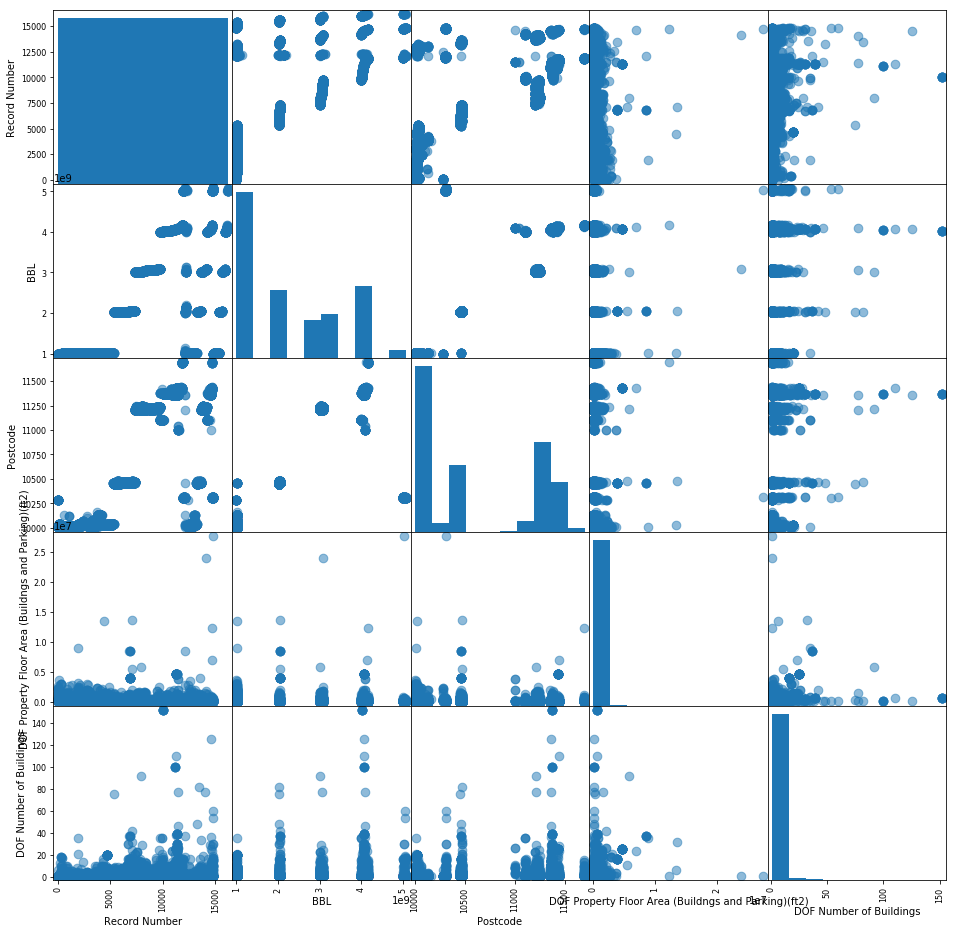

In [21]:
scatter_matrix (energy_df, s=300, figsize=(16, 16));

### [Figure1: Scatter matrix of Energy consumption reduced dataset. The plot shows graph of every column 
### with every other column]

In [22]:
(manhattan.BBL.values[0]), (energy_df.BBL.values[0])

(1000010010.0, 1000410001.0)

### Merging datasets on 'BBL' column

In [23]:
energy_df_new = energy_df_new.dropna(axis=0)

In [24]:
manhattan = manhattan.dropna(axis=0)

In [25]:
bbl_data = pd.merge(energy_df_new, manhattan, on='BBL')

In [26]:
len(bbl_data)

4789

In [27]:
energy_df_new['Site EUI(kBtu/ft2)'] = pd.to_numeric(energy_df_new['Site EUI(kBtu/ft2)'], errors='coerce')
energy_df_new['Reported Property Floor Area (Building(s)) (ft²)'] = pd.to_numeric(
    energy_df_new['Reported Property Floor Area (Building(s)) (ft²)'], errors='coerce')
bbl_data['UnitsTotal'] = pd.to_numeric(bbl_data['UnitsTotal'], errors='coerce')

In [28]:
bbl_data['Site EUI(kBtu/ft2)'] = pd.to_numeric(bbl_data['Site EUI(kBtu/ft2)'], errors='coerce')
bbl_data['Reported Property Floor Area (Building(s)) (ft²)'] = pd.to_numeric(
    bbl_data['Reported Property Floor Area (Building(s)) (ft²)'], errors='coerce')

### Scatter Matrix

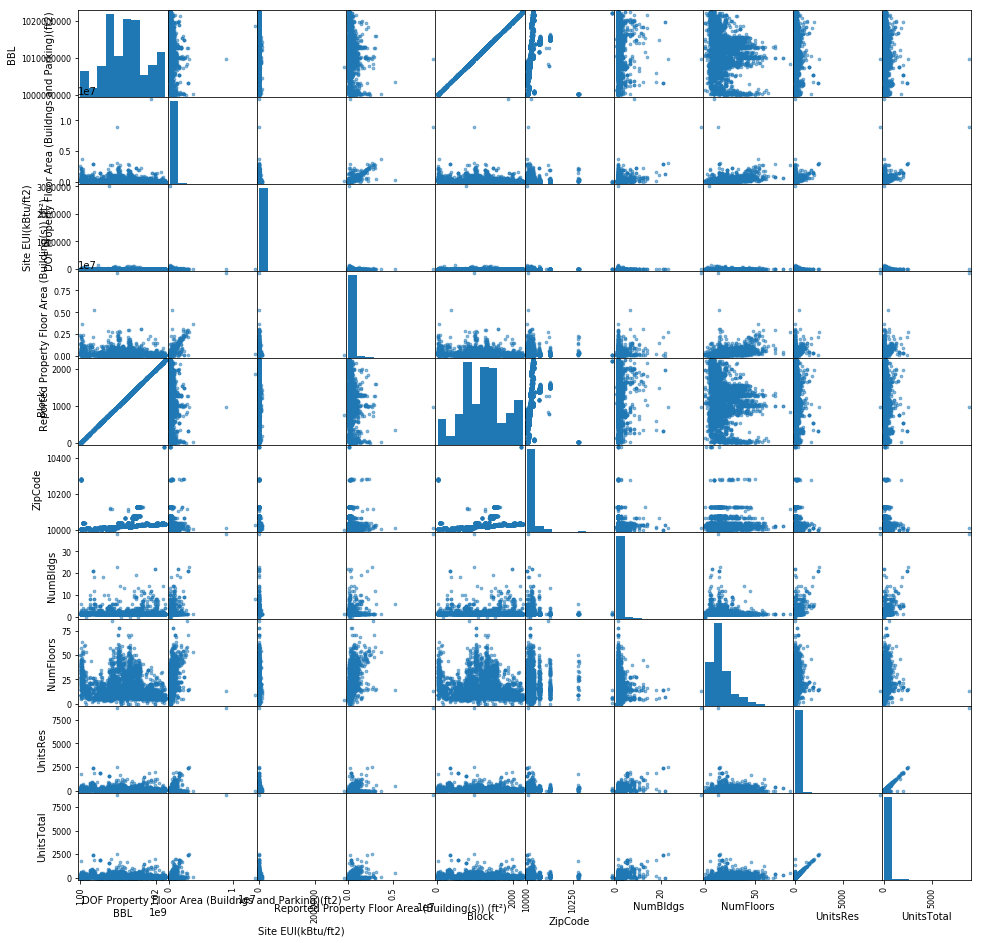

In [29]:
scatter_matrix (bbl_data, s=30, figsize=(16, 16));

### [Figure2: Scatter matrix of merged dataset. The plot shows graph of every column with every other column]

Text(0.5,1,'Energy Consumption by Units')

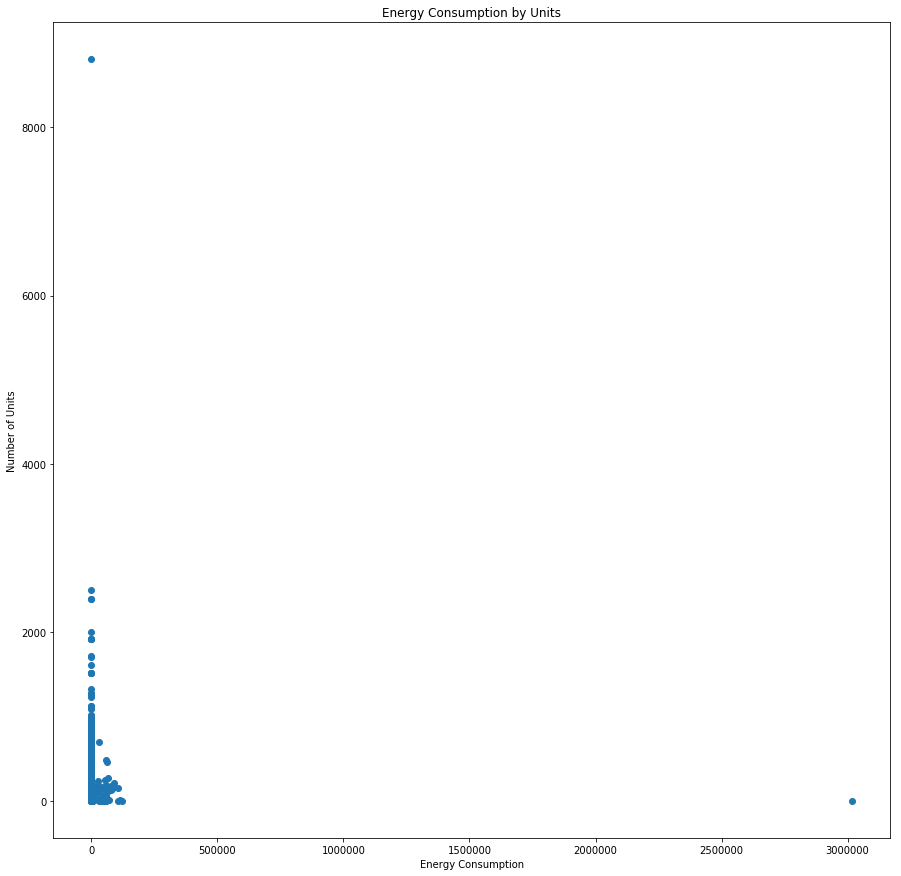

In [30]:
pl.figure(figsize=(15,15))
pl.scatter(bbl_data['Site EUI(kBtu/ft2)'], bbl_data['UnitsTotal'])
pl.xlabel('Energy Consumption')
pl.ylabel('Number of Units')
pl.title('Energy Consumption by Units')

### [Figure3: Scatter plot of energy consumption (Y-axis) by Number of Units(X- axis)
### The plot shows data needs a lot of processing before mdelling it
### As it can be seen there is a clutter of points near origin which implies zero energy consumption
### Also implies zero number of units. All of this can be thought as outliers]

In [31]:
bbl_data.columns

Index(['BBL', 'ENERGY STAR Score',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Site EUI(kBtu/ft2)',
       'Reported Property Floor Area (Building(s)) (ft²)', 'Block', 'ZipCode',
       'BldgClass', 'NumBldgs', 'NumFloors', 'UnitsRes', 'UnitsTotal'],
      dtype='object')

### Getting Total Energy Consumption

In [32]:
## Renaming column Reported Property Floor Area
bbl_data = bbl_data.rename(columns={'Reported Property Floor Area (Building(s)) (ft²)': 'Reported Property Floor Area'})

In [33]:
bbl_data['Total_energy'] = bbl_data['Reported Property Floor Area'] * bbl_data['Site EUI(kBtu/ft2)']

In [34]:
bbl_data_cut_new=1

In [35]:
bbl_data_cut = bbl_data[bbl_data['Site EUI(kBtu/ft2)'] < 2000]

In [36]:
bbl_data_cut = bbl_data_cut[bbl_data_cut['Total_energy']!=0]

In [37]:
bbl_data_cut = bbl_data_cut[bbl_data_cut['UnitsTotal']!=0]

In [38]:
bbl_data_cut = bbl_data_cut[bbl_data_cut['UnitsTotal']<4000]

In [39]:
bbl_data_cut_new = bbl_data_cut[['Total_energy','UnitsTotal']].copy()

Text(0.5,1,'Energy Consumption by Number of Units')

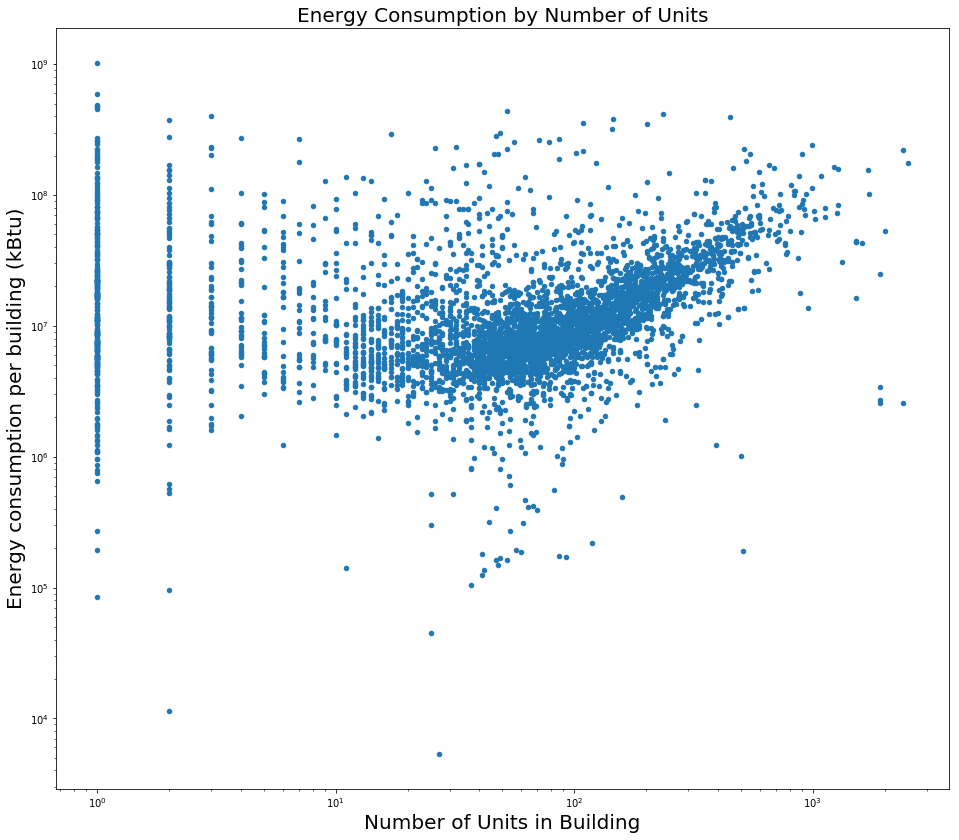

In [40]:
ax = bbl_data_cut_new.plot(kind='scatter', y='Total_energy', x='UnitsTotal', 
                   marker='o',  figsize=(16, 14), loglog=True)
yl = ax.set_xlabel("Number of Units in Building", fontsize=20)
xl = ax.set_ylabel("Energy consumption per building (kBtu)", fontsize=20)
ax.set_title('Energy Consumption by Number of Units',fontsize=20)

### [Figure 4: Similar to Figure 3 but the plot is after removing ouliers]

### Creating a linear model for energy comsumption and number of units using statsmodel

### 1.  Creating model using Number of Units as independent variable
###      x --> NUMBER OF UNITS
###      y --> TOTAL ENERGY
###     Since the plot is using log values, the model will be run on log values

In [41]:
bbl_data_cut = bbl_data_cut[bbl_data_cut['UnitsTotal']>10]

In [42]:
bbl_data_cut_new = bbl_data_cut[['Total_energy','UnitsTotal']].copy()

In [43]:
bbl_data_cut_new['Energy_log'] = np.log10(bbl_data_cut_new['Total_energy'])
bbl_data_cut_new['Units_log'] = np.log10(bbl_data_cut_new['UnitsTotal'])

In [44]:
model1_1 = smf.ols('Energy_log~Units_log', data=bbl_data_cut_new).fit()

In [45]:
model1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Energy_log   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     1146.
Date:                Sun, 26 Nov 2017   Prob (F-statistic):          5.21e-221
Time:                        18:20:36   Log-Likelihood:                -1563.9
No. Observations:                3979   AIC:                             3132.
Df Residuals:                    3977   BIC:                             3144.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.1073      0.028    221.584      0.000         6.053     6.161
Units_log      0.4791      0.014     33.856      0.000         0.451     0.507
==============================================================================
Omnibus:                      530.842   Durbin-Watson:                   1.523
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6722.090
Skew:                           0.047   Prob(JB):                         0.00
Kurtosis:                       9.367   Cond. No.                         11.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

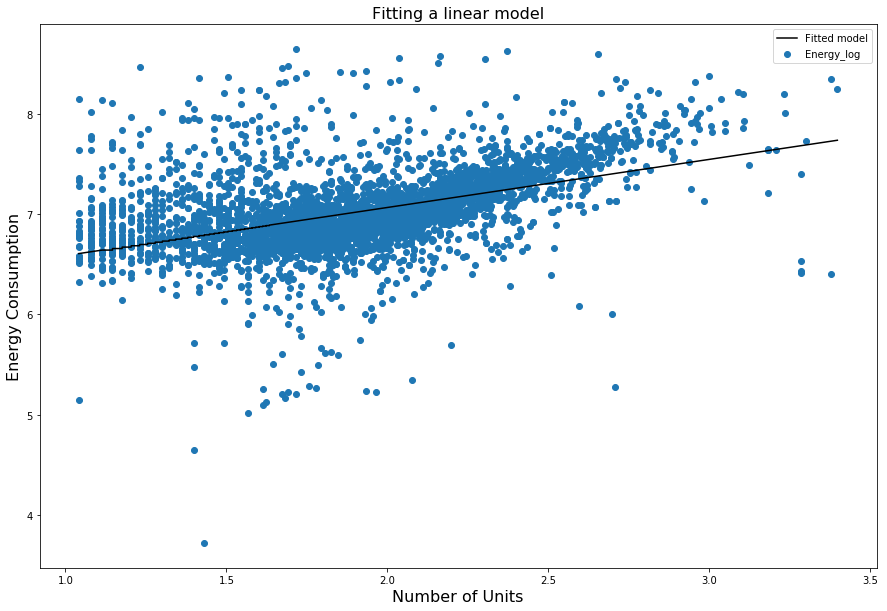

In [46]:
pl.figure(figsize=(15,10))
pl.scatter(bbl_data_cut_new['Units_log'],bbl_data_cut_new['Energy_log'])
pl.plot(bbl_data_cut_new['Units_log'].head(len(model1_1.predict())).sort_values(),np.sort(model1_1.predict()),
        c='black',label='Fitted model')
pl.xlabel("Number of Units", fontsize=16)
pl.ylabel("Energy Consumption", fontsize=16)
pl.title("Fitting a linear model", fontsize=16)
pl.legend()

### [Figure 5: Plotting a scatter plot of Energy Consumption vs Units. 
### Also Adding a line plot to show how linear model is fitting the data]

### 2.  Creating model using Energy as independent variable
###      x --> TOTAL ENERGY
###      y --> NUMBER OF UNITS
###     Since the plot is using log values, the model will be run on log values

In [47]:
model1_2 = smf.ols('Units_log~Energy_log', data=bbl_data_cut_new).fit()

In [48]:
model1_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Units_log   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     1146.
Date:                Sun, 26 Nov 2017   Prob (F-statistic):          5.21e-221
Time:                        18:20:37   Log-Likelihood:                -1513.0
No. Observations:                3979   AIC:                             3030.
Df Residuals:                    3977   BIC:                             3043.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.3726      0.097    -14.151      0.000        -1.563    -1.182
Energy_log     0.4670      0.014     33.856      0.000         0.440     0.494
==============================================================================
Omnibus:                      161.719   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.396
Skew:                          -0.376   Prob(JB):                     8.51e-54
Kurtosis:                       3.953   Cond. No.                         124.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

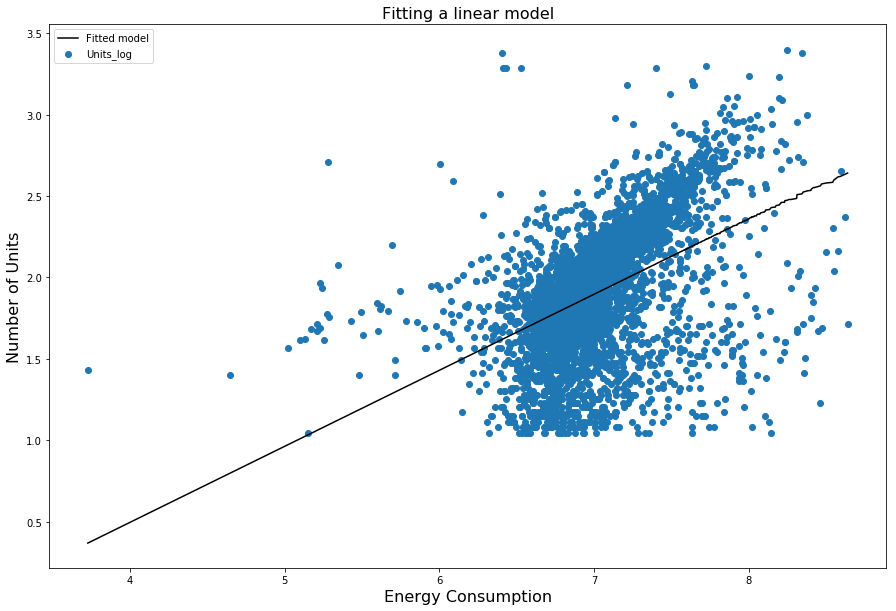

In [49]:
pl.figure(figsize=(15,10))
pl.scatter(bbl_data_cut_new['Energy_log'],bbl_data_cut_new['Units_log'])
pl.plot(bbl_data_cut_new['Energy_log'].head(len(model1_2.predict())).sort_values(),np.sort(model1_2.predict()),
        c='black',label='Fitted model')
pl.xlabel("Energy Consumption", fontsize=16)
pl.ylabel("Number of Units", fontsize=16)
pl.title("Fitting a linear model", fontsize=16)
pl.legend()

### [Figure 6: Similar to Figure 5 with axis swapped]

### 3 & 4. Comparing Two models
### The R-squared and adjusted R-squared for both the models is the same. That is surprising!
### Still comparing the two models using Chi square.

### Using Poisson Statistics for independent variable.
### Therefore error will be square root of measurement.

In [50]:
energy = bbl_data_cut_new['Energy_log'].tolist()

In [51]:
energy = np.sort(energy)

In [52]:
energy_predict = model1_1.predict()
energy_predict = np.sort(energy_predict)

In [53]:
## Chi square for model 1
chi = np.empty(len(model1_1.predict()))

In [54]:
for i in range(len(model1_1.predict())):
    diff = energy_predict[i]-energy[i]
    chi[i] = diff**2 / energy[i]

In [55]:
chi.sum()

31.1792008659198

In [56]:
## Chi square for model 1
chi = np.empty(len(model1_2.predict()))

In [57]:
unit = bbl_data_cut_new['Units_log'].tolist()

In [58]:
unit = np.sort(unit)

In [59]:
unit_predict = model1_2.predict()
unit_predict = np.sort(unit_predict)

In [60]:
for i in range(len(model1_2.predict())):
    diff = unit_predict[i]-unit[i]
    chi[i] = diff**2 / unit[i]

In [61]:
chi.sum()

116.06617938991897

### According to me the Chi square value is pretty high, considering DOF = 1 and critical value of 3.84
### Both the models models are having chi square higher than critical value.
### Both can be said to be good.

### 5. Using 2nd Degree polynomial to fit the data

In [62]:
model2 = smf.ols('Energy_log~Units_log + I(Units_log**2)', data=bbl_data_cut_new).fit()

In [63]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Energy_log   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     767.4
Date:                Sun, 26 Nov 2017   Prob (F-statistic):          1.46e-282
Time:                        18:20:37   Log-Likelihood:                -1418.3
No. Observations:                3979   AIC:                             2843.
Df Residuals:                    3976   BIC:                             2861.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             7.6192      0.091     83.742      0.000         7.441     7.798
Units_log            -1.1348      0.094    -12.087      0.000        -1.319    -0.951
I(Units_log ** 2)     0.4123      0.024     17.374      0.000         0.366     0.459
==============================================================================
Omnibus:                      655.132   Durbin-Watson:                   1.542
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11331.539
Skew:                          -0.205   Prob(JB):                         0.00
Kurtosis:                      11.257   Cond. No.                         112.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

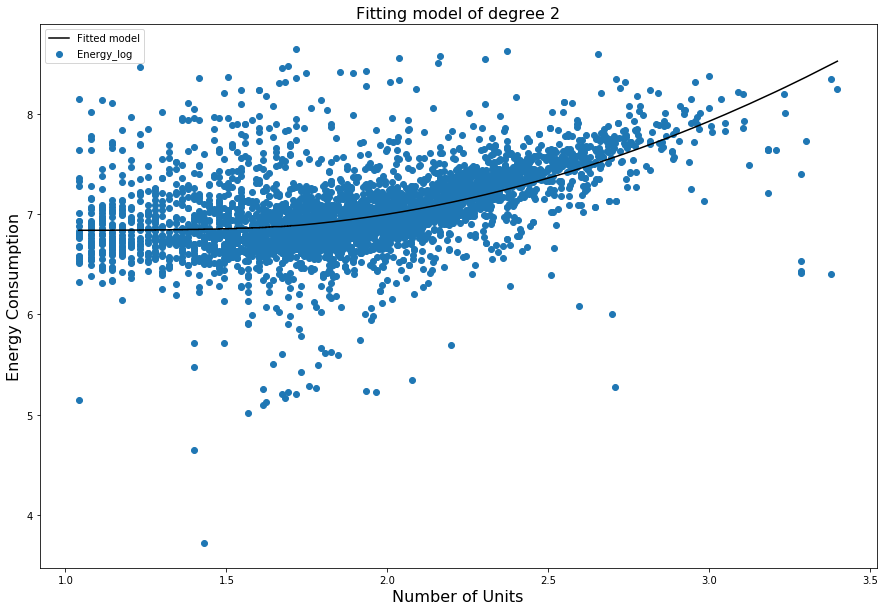

In [64]:
pl.figure(figsize=(15,10))
pl.scatter(bbl_data_cut_new['Units_log'],bbl_data_cut_new['Energy_log'])
pl.plot(bbl_data_cut_new['Units_log'].head(len(model2.predict())).sort_values(),np.sort(model2.predict()),
        c='black',label='Fitted model')
pl.xlabel("Number of Units", fontsize=16)
pl.ylabel("Energy Consumption", fontsize=16)
pl.title("Fitting model of degree 2",fontsize=16)
pl.legend()

### [Figure 7: Plotting scatter plot same as Figure 5.
### Fiitng a model of degree 2 to the same data]

### 6. Comparision of models

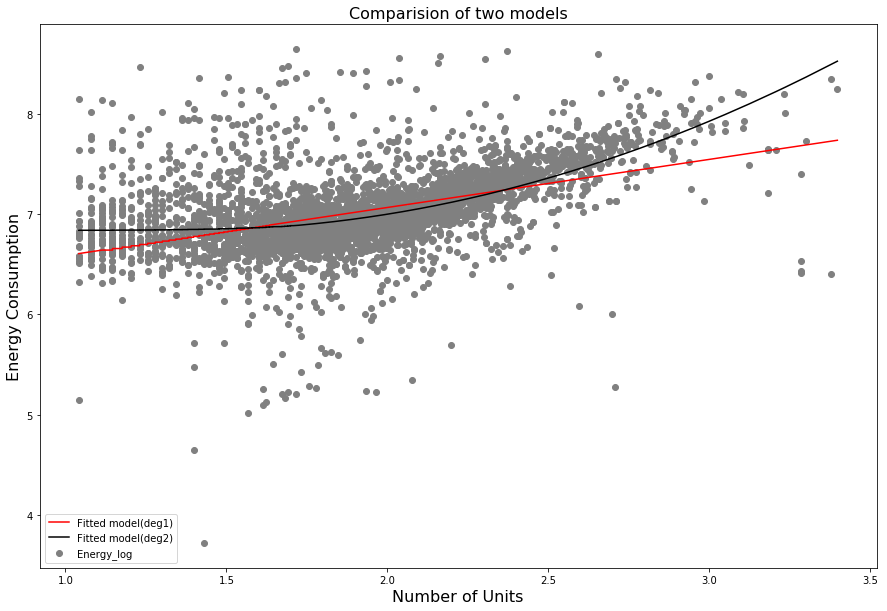

In [65]:
pl.figure(figsize=(15,10))
pl.scatter(bbl_data_cut_new['Units_log'],bbl_data_cut_new['Energy_log'],c='grey')
pl.plot(bbl_data_cut_new['Units_log'].head(len(model1_1.predict())).sort_values(),np.sort(model1_1.predict()),
        c='red',label='Fitted model(deg1)')
pl.plot(bbl_data_cut_new['Units_log'].head(len(model2.predict())).sort_values(),np.sort(model2.predict()),
        c='black',label='Fitted model(deg2)')
pl.xlabel("Number of Units", fontsize=16)
pl.ylabel("Energy Consumption",fontsize=16)
pl.title("Comparision of two models",fontsize=16)
pl.legend()

### [Figure 8: Plotting a scatter plot similar to figure 5. Plotting models of both degree 1 and 2
### It can be seen from the plot and values of Adjusted R-sqiared of both models, model of 
### Degree 2 performs better]

### Comparing using log likelihood

In [66]:
(model1_1.llf - model2.llf) * -2

291.17129206806294

In [67]:
model2.compare_lr_test(model1_1)

(291.17129206806294, 2.7627661063090715e-65, 1.0)

## ASH - Score 100. Extra Credit Missing